In [ ]:
# below libraries are required only for analysis so they are not put in the requirements.txt
!pip install seaborn
!pip install matplotlib

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns


In [2]:
input_file = 'data/dataset.csv'

In [106]:
df = pd.read_csv(input_file)
print(df.shape)
print("Number of NAs in dataset : ",df.isna().sum().sum())
df.describe()

(5000, 11)
Number of NAs in dataset :  0


,age,income,time_spent_on_platform,number_of_sessions,fields_filled_percentage,previous_year_filing,completed_filing
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,41.611000,69769.061600,99.938225,10.081200,0.695932,0.398200,0.896000
std,13.794076,29154.009604,19.833898,3.222652,0.173241,0.489576,0.305291
min,18.000000,20028.000000,36.004789,1.000000,0.400061,0.000000,0.000000
25%,30.000000,44360.750000,86.099630,8.000000,0.546594,0.000000,1.000000
50%,42.000000,69200.500000,99.636480,10.000000,0.695268,0.000000,1.000000
75%,53.000000,95483.500000,113.193773,12.000000,0.845220,1.000000,1.000000
max,65.000000,119993.000000,163.967964,27.000000,0.999940,1.000000,1.000000


In [77]:
df.head(1)

,age,income,employment_type,marital_status,time_spent_on_platform,number_of_sessions,fields_filled_percentage,previous_year_filing,device_type,referral_source,completed_filing
0,56,108031,unemployed,married,96.472746,7,0.598336,1,tablet,social_media_ad,1


In [78]:
# types of data
print(df.dtypes)

age                           int64
income                        int64
employment_type              object
marital_status               object
time_spent_on_platform      float64
number_of_sessions            int64
fields_filled_percentage    float64
previous_year_filing          int64
device_type                  object
referral_source              object
completed_filing              int64
dtype: object


In [79]:
# get the names of categorical columns and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

print("Categorical columns : ",categorical_columns)
print("Numerical columns : ",numerical_columns)

Categorical columns :  Index(['employment_type', 'marital_status', 'device_type', 'referral_source'], dtype='object')
Numerical columns :  Index(['age', 'income', 'time_spent_on_platform', 'number_of_sessions',
       'fields_filled_percentage', 'previous_year_filing', 'completed_filing'],
      dtype='object')


In [80]:
# get the categorical columns and their unique values
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(col, df[col].unique())
    

employment_type ['unemployed' 'full_time' 'part_time' 'contractor']
marital_status ['married' 'single' 'divorced']
device_type ['tablet' 'desktop' 'mobile']
referral_source ['social_media_ad' 'organic_search' 'friend_referral']


In [81]:
# unique values in previous_year_filing
print(df['previous_year_filing'].unique())


[1 0]


In [82]:
df_label_encoded = df.copy()

# Apply Label Encoding to new columns
encoders = {}  # Store encoders for potential reverse mapping
for column in categorical_columns:
    new_column_name = column + '_encoded'  # Create a new column name
    le = LabelEncoder()
    df_label_encoded[new_column_name] = le.fit_transform(df[column])
    encoders[column] = le


In [83]:
df_label_encoded.head(5)

,age,income,employment_type,marital_status,time_spent_on_platform,number_of_sessions,fields_filled_percentage,previous_year_filing,device_type,referral_source,completed_filing,employment_type_encoded,marital_status_encoded,device_type_encoded,referral_source_encoded
0,56,108031,unemployed,married,96.472746,7,0.598336,1,tablet,social_media_ad,1,3,1,2,2
1,46,57019,full_time,single,69.462216,9,0.959306,0,tablet,social_media_ad,1,1,2,2,2
2,32,64948,unemployed,single,94.738805,5,0.707122,0,tablet,organic_search,1,3,2,2,1
3,60,85133,part_time,divorced,96.874083,5,0.908276,1,tablet,friend_referral,1,2,0,2,0
4,25,86458,unemployed,single,66.033974,6,0.769536,1,desktop,organic_search,1,3,2,0,1


In [102]:
# create numerical columns dataframe and drop the original categorical columns
df_numerical = df_label_encoded.drop(categorical_columns, axis=1)

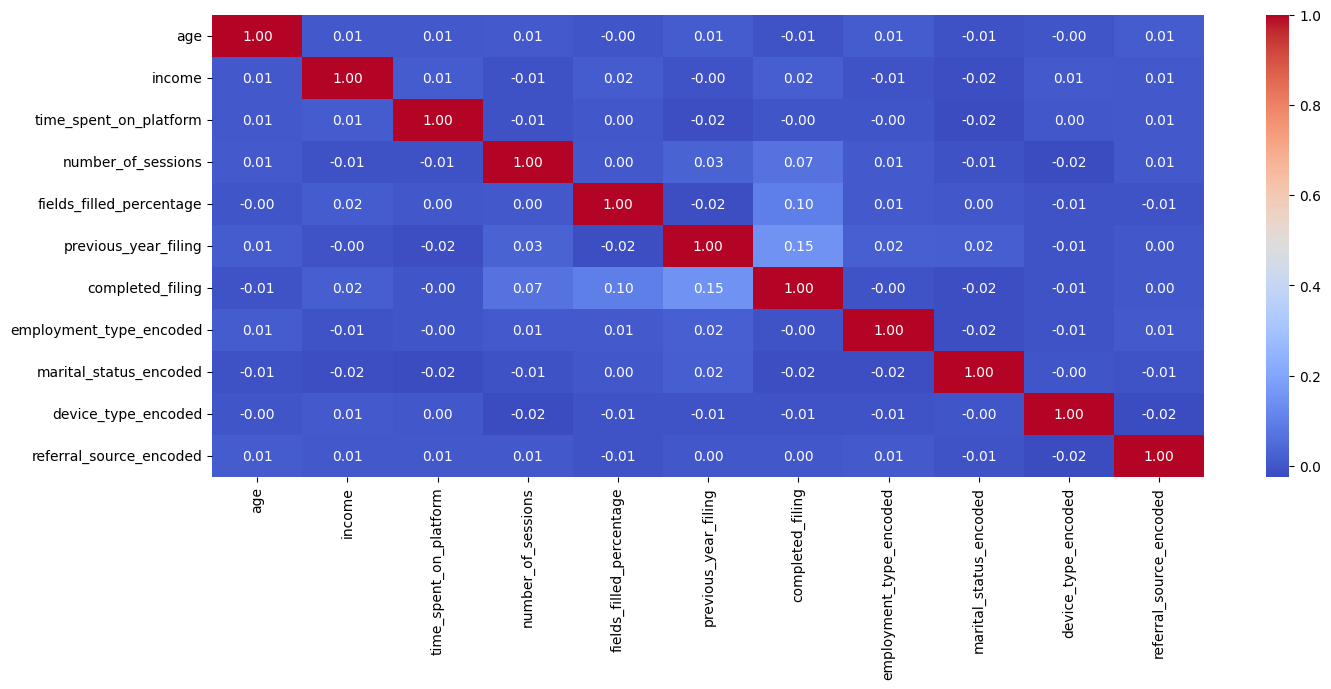

In [103]:
# Create a heatmap (using only numerical and encoded columns)
plt.figure(figsize=(16, 6))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [104]:
# check imbalance in the target column : completed_filing
print(df_numerical['completed_filing'].value_counts())

completed_filing
1    4480
0     520
Name: count, dtype: int64


In [105]:
# correlation matrix of df_numerical
correlation_matrix = df_numerical.corr()
correlation_matrix['completed_filing'].sort_values(ascending=False)

completed_filing            1.000000
previous_year_filing        0.149985
fields_filled_percentage    0.098180
number_of_sessions          0.065109
income                      0.017735
referral_source_encoded     0.000833
time_spent_on_platform     -0.000833
employment_type_encoded    -0.004718
device_type_encoded        -0.007429
age                        -0.007851
marital_status_encoded     -0.019160
Name: completed_filing, dtype: float64

In [108]:
# create one new column: previous_year_filing true and has fields_filled_percentage > 0.5

df_numerical["previous_year_filing_true_and_fields_filled_percentage_gt_0.5"] = (df_numerical["previous_year_filing"] == 1) & (df_numerical["fields_filled_percentage"] > 0.5)

# correlation matrix of df_numerical
correlation_matrix = df_numerical.corr()
correlation_matrix['completed_filing'].sort_values(ascending=False)




completed_filing                                                 1.000000
previous_year_filing                                             0.149985
previous_year_filing_true_and_fields_filled_percentage_gt_0.5    0.142020
fields_filled_percentage                                         0.098180
number_of_sessions                                               0.065109
income                                                           0.017735
referral_source_encoded                                          0.000833
time_spent_on_platform                                          -0.000833
employment_type_encoded                                         -0.004718
device_type_encoded                                             -0.007429
age                                                             -0.007851
marital_status_encoded                                          -0.019160
Name: completed_filing, dtype: float64

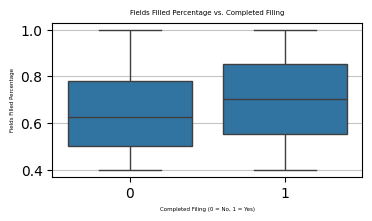

In [117]:
# createa graph of fields_filled_percentage vs completed_filing
# completed_filing = 1 means the filing is completed
# completed_filing = 0 means the filing is not completed
# fields_filled_percentage is the percentage of fields filled in the form

# --- Visualization ---
plt.figure(figsize=(4, 2))

# Create the plot (using seaborn for better aesthetics)
sns.boxplot(x='completed_filing', y='fields_filled_percentage', data=df_label_encoded)

# Customize the plot
plt.title('Fields Filled Percentage vs. Completed Filing', fontsize=5)
plt.xlabel('Completed Filing (0 = No, 1 = Yes)', fontsize=4)
plt.ylabel('Fields Filled Percentage', fontsize=4)
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

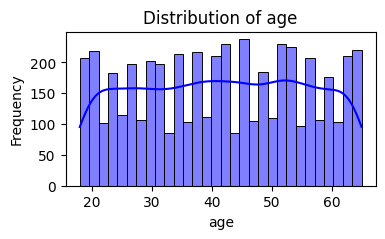

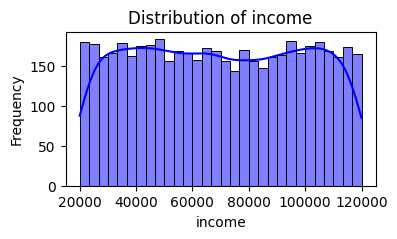

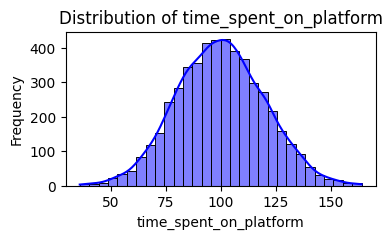

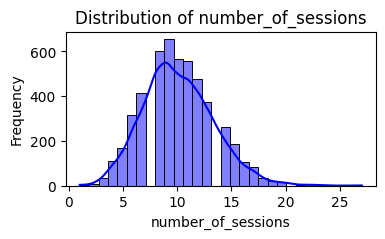

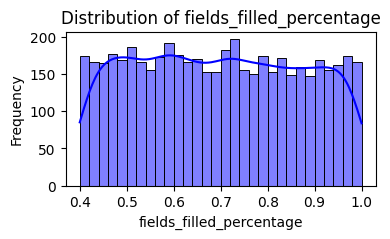

In [115]:
numerical_cols = ['age', 'income', 'time_spent_on_platform', 'number_of_sessions', 'fields_filled_percentage']
# Visualize distributions of key numerical features
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

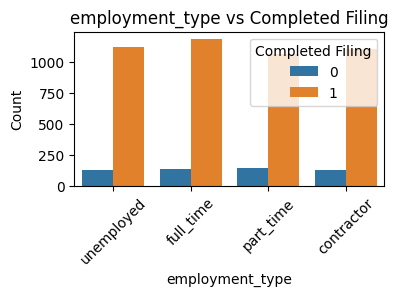

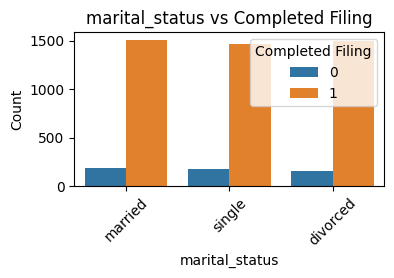

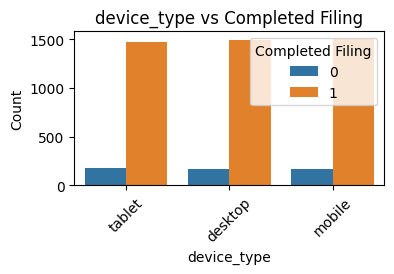

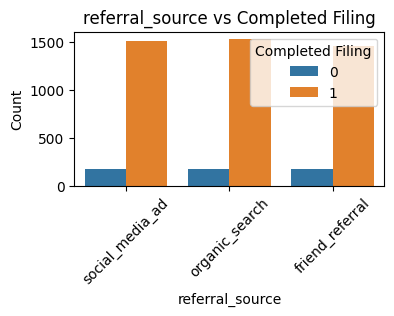

In [119]:
# Analyze categorical variables and their relationship with the target
categorical_cols = ['employment_type', 'marital_status', 'device_type', 'referral_source']

for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df, x=col, hue='completed_filing')
    plt.title(f'{col} vs Completed Filing')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Completed Filing', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

In [121]:
# Feature importance analysis using a basic tree-based model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
encoded_data = df.copy()
for col in categorical_cols + ['device_type', 'referral_source']:
    encoder = LabelEncoder()
    encoded_data[col] = encoder.fit_transform(encoded_data[col])

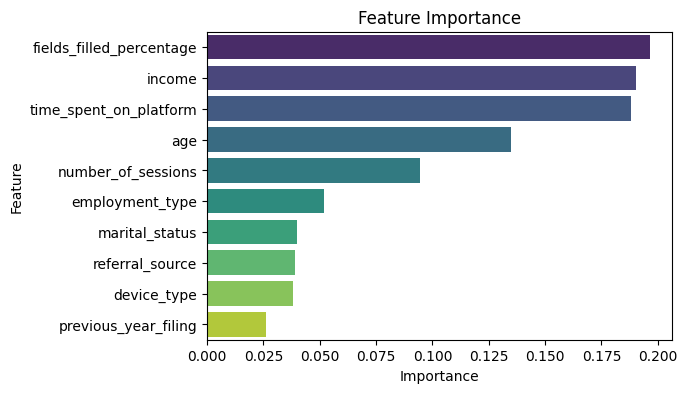

In [128]:
# Prepare data for modeling
X = encoded_data.drop('completed_filing', axis=1)
y = encoded_data['completed_filing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# print(feature_importance)

# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis', hue='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Observation : 
1) Focus on optimizing the most influential features, such as making the platform user-friendly to increase fields_filled_percentage or better targeting based on income demographics.
2) People are from all different ages
